# Credit Card Fraud EDA

Dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud. Contains transactions made by credit cards in September 2013 by European cardholders. Data has been transformed through Principal Component Analysis (PCA). As a result, dataset contains components such as V1, V2, ... V28. Time and Amount original datas have not been transformed.

# Load Data

In [3]:
# Import necessary libraries and dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import sklearn
%matplotlib inline

In [6]:
# Read data
original_data = pd.read_csv("input\creditcardfraud\creditcard.csv")
original_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Correlation Matrix Heat Map

A correlation coefficient takes up values between -1 and 1. Value of 1 = Very strong positive relationship. Value of -1 = Very string negative relationship. Value of 0 = No relationship. Will be using Pearson Correlation matrix. https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/

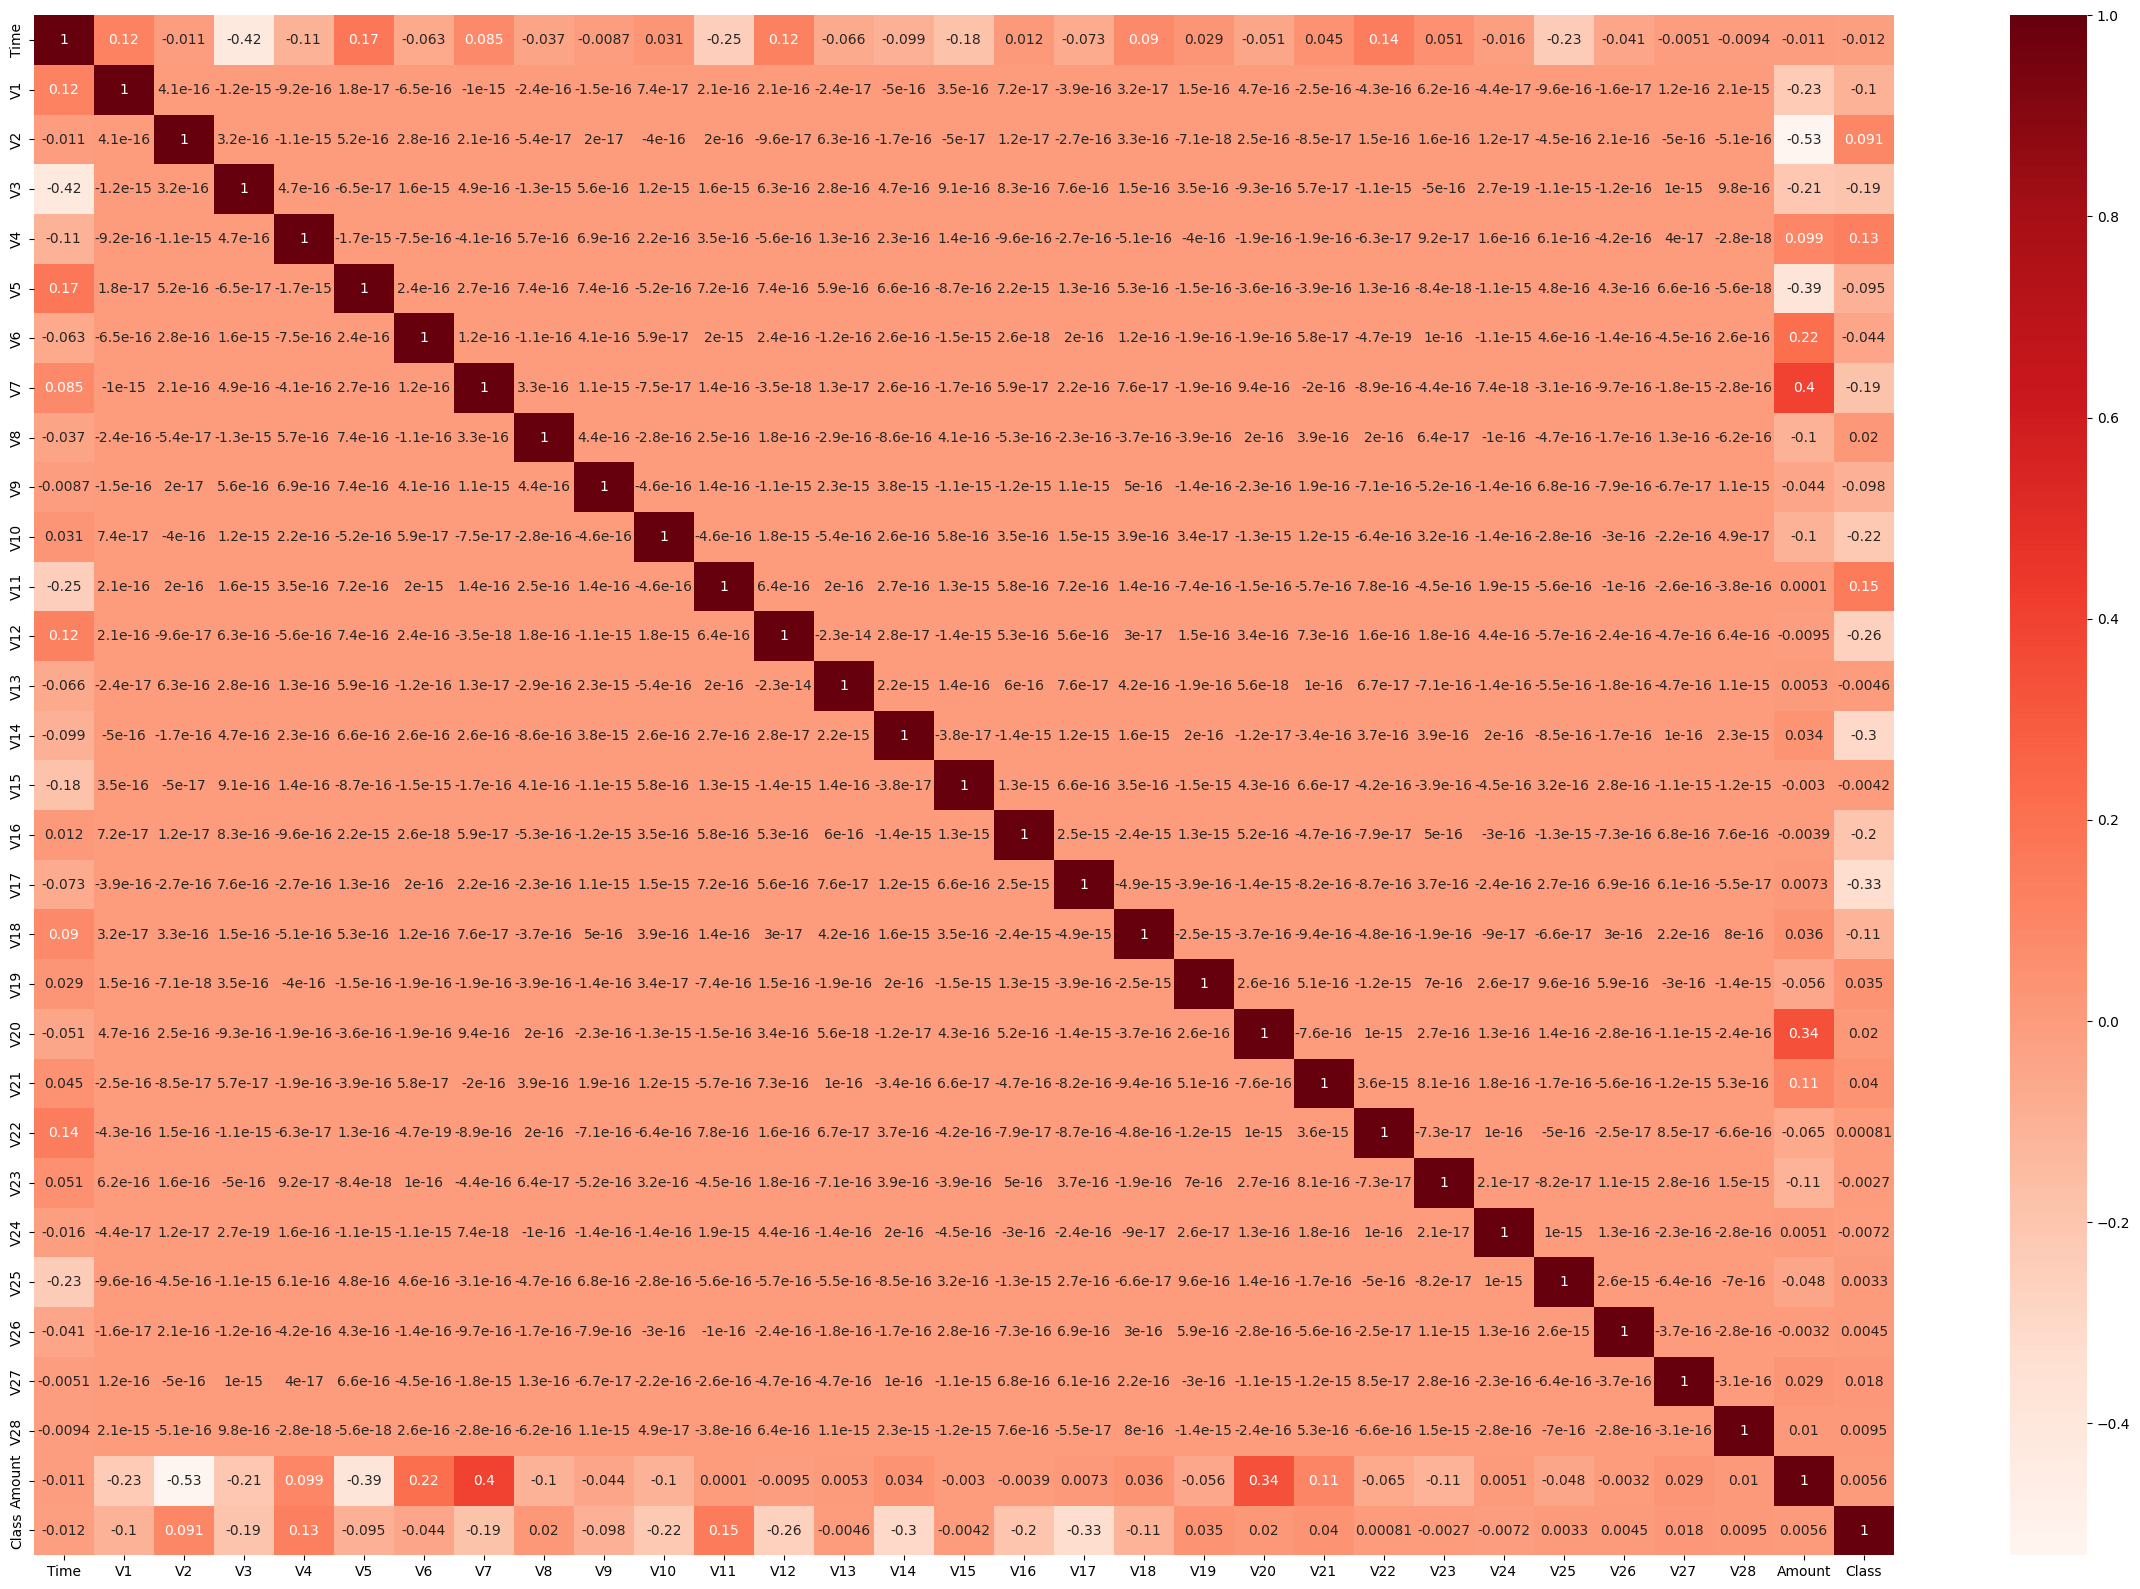

In [7]:
#Display Pearson correlation HeatMap for all variables
plt.figure(figsize=(30,20))
cor = original_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Notice variables **V12, V14, and V17** have to most correlation to the class attribute (rougly |-0.26| to |-0.33|, greater than other variables which are less than |-0.1|) We will mark these down as 'significant' variables for determining class.

## Scatter Plots

We can visualize the relationships obtained through the correlation matrix in scatter plots. By plotting each 'significant' variable (V12, V14, V17) against an insignificant variable such as V13 to visualize fruadulent variables and normal vairables.

<AxesSubplot: xlabel='V13', ylabel='V17'>

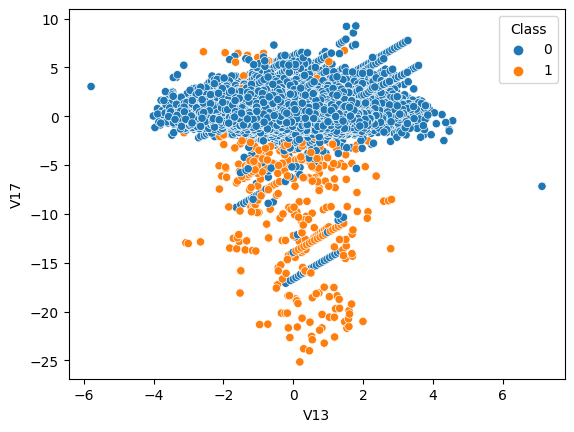

In [8]:
sns.scatterplot(x=original_data['V13'], y=original_data['V17'], hue=original_data['Class'])

<AxesSubplot: xlabel='V13', ylabel='V14'>

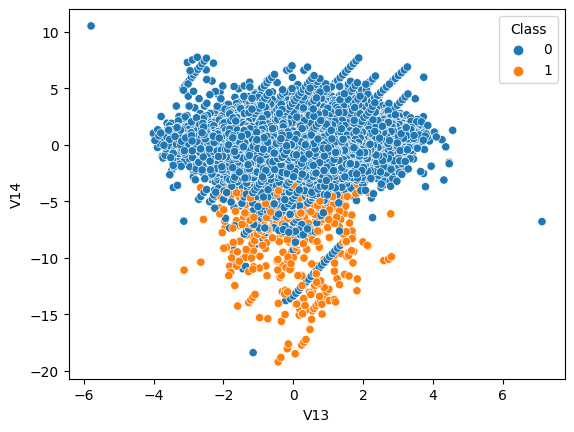

In [9]:
sns.scatterplot(x=original_data['V13'], y=original_data['V14'], hue=original_data['Class'])

<AxesSubplot: xlabel='V13', ylabel='V12'>

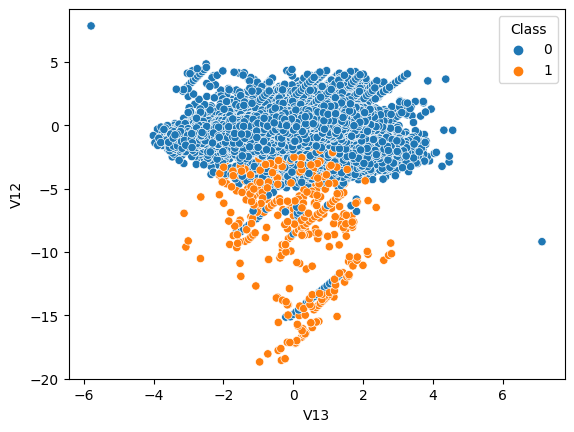

In [10]:
sns.scatterplot(x=original_data['V13'], y=original_data['V12'], hue=original_data['Class'])

Notice there is a clear separation between fraud (1) and normal data points (0). Although not specific enough, the scatter plots provide us with a good idea of the situation.

## Kernel density estimation (KDE) plots

In order to get more specific, we will approximate each 'significant' variable's underlying probability density function for each class value using kernal density estimation (https://scikit-learn.org/stable/modules/density.html). This will help us visualize how fraudulent and normal datapoints are distributed.

C:\Users\arvin\AppData\Local\Temp\ipykernel_13052\1676809692.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=original_data[original_data['Class'] == 0]['V17'], label="Class 0", shade=True)
C:\Users\arvin\AppData\Local\Temp\ipykernel_13052\1676809692.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=original_data[original_data['Class'] == 1]['V17'], label="Class 1", shade=True)


<AxesSubplot: xlabel='V17', ylabel='Density'>

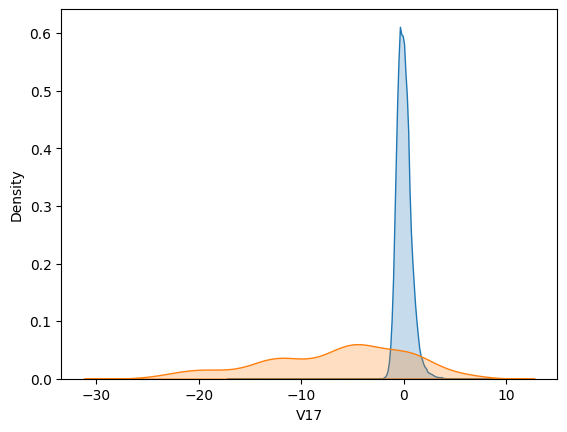

In [11]:
# Plot KDE for V17 values that belong to Class 0 (Normal)
sns.kdeplot(data=original_data[original_data['Class'] == 0]['V17'], label="Class 0", shade=True)
# Plot KDE for V17 values that belong to Class 1 (Fraud)
sns.kdeplot(data=original_data[original_data['Class'] == 1]['V17'], label="Class 1", shade=True)

C:\Users\arvin\AppData\Local\Temp\ipykernel_13052\2654731429.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=original_data[original_data['Class'] == 0]['V14'], label="Class 0", shade=True)
C:\Users\arvin\AppData\Local\Temp\ipykernel_13052\2654731429.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=original_data[original_data['Class'] == 1]['V14'], label="Class 1", shade=True)


<AxesSubplot: xlabel='V14', ylabel='Density'>

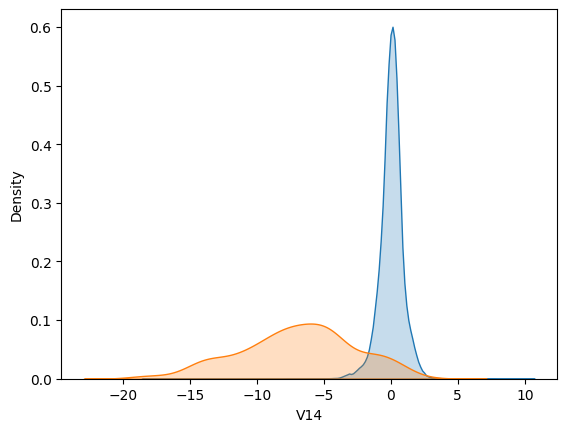

In [12]:
sns.kdeplot(data=original_data[original_data['Class'] == 0]['V14'], label="Class 0", shade=True)
sns.kdeplot(data=original_data[original_data['Class'] == 1]['V14'], label="Class 1", shade=True)

C:\Users\arvin\AppData\Local\Temp\ipykernel_13052\1177752784.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=original_data[original_data['Class'] == 0]['V12'], label="Class 0", shade=True)
C:\Users\arvin\AppData\Local\Temp\ipykernel_13052\1177752784.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=original_data[original_data['Class'] == 1]['V12'], label="Class 1", shade=True)


<AxesSubplot: xlabel='V12', ylabel='Density'>

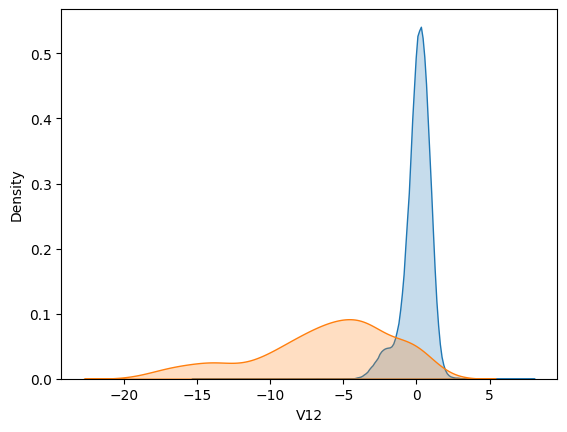

In [13]:
sns.kdeplot(data=original_data[original_data['Class'] == 0]['V12'], label="Class 0", shade=True)
sns.kdeplot(data=original_data[original_data['Class'] == 1]['V12'], label="Class 1", shade=True)

C:\Users\arvin\AppData\Local\Temp\ipykernel_13052\2561540109.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=original_data[original_data['Class'] == 0]['V25'], label="Class 0", shade=True)
C:\Users\arvin\AppData\Local\Temp\ipykernel_13052\2561540109.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=original_data[original_data['Class'] == 1]['V25'], label="Class 1", shade=True)


<AxesSubplot: xlabel='V25', ylabel='Density'>

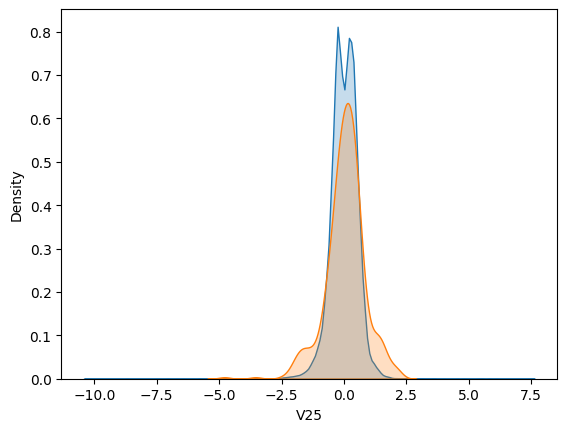

In [14]:
sns.kdeplot(data=original_data[original_data['Class'] == 0]['V25'], label="Class 0", shade=True)
sns.kdeplot(data=original_data[original_data['Class'] == 1]['V25'], label="Class 1", shade=True)

Notice that in each of the graph, the normal datapoints follow a standard normal distribution. Also notice that in the first three graphs (V12, V17, V14), the fraudulent datapoints follow a standard normal distribution with height standard deviation, or in otherwords highly spread out. In the last graph, comparing an 'insignificant' variable (V25), both the fraudulent and normal datapoints follow similar standard normal distribution. 

Statistical Data Analysis:

In [15]:
# Values of the variable V14 that belong to Class 0 (Normal)
original_data[original_data['Class'] == 0]['V14'].describe()

count    284315.000000
mean          0.012064
std           0.897007
min         -18.392091
25%          -0.422453
50%           0.051947
75%           0.494104
max          10.526766
Name: V14, dtype: float64

In [16]:
# Values of the variable V14 that belong to Class 1 (Fraud)
original_data[original_data['Class'] == 1]['V14'].describe()

count    492.000000
mean      -6.971723
std        4.278940
min      -19.214325
25%       -9.692723
50%       -6.729720
75%       -4.282821
max        3.442422
Name: V14, dtype: float64

## Recall

One thing to note is that the dataset is extremely imbalanced with fruads taking up only 0.172% of all transactions. As a result, a simple accuracy measurement is not a fair measurement of a classifier's performance (classifying all non-fruadulant transactions would result in high accuracy regardless of classifications of the other class). Thus, we will look at a metric called Recall (number of true positives divided by the number of true positives plus the number of false negatives).